In [1]:
%matplotlib inline

1. Predict with pre-trained Mask RCNN models
===============================================

This article shows how to play with pre-trained Mask RCNN model.

Mask RCNN networks are extensions to Faster RCNN networks.
:py:class:`gluoncv.model_zoo.MaskRCNN` is inherited from
:py:class:`gluoncv.model_zoo.FasterRCNN`.
It is highly recommended to read :doc:`../examples_detection/demo_faster_rcnn` first.

First let's import some necessary libraries:


In [2]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

Load a pretrained model
-------------------------

Let's get an Mask RCNN model trained on COCO dataset with ResNet-50 backbone.
By specifying ``pretrained=True``, it will automatically download the model
from the model zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.MaskRCNN`
with a default context of `cpu(0)`.



In [4]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

Pre-process an image
--------------------

The pre-processing step is identical to Faster RCNN.

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



In [7]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

In [9]:
im_fname = utils.download(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\Trees\datasets\Ottawa\tree_jpg2\-_rkGFM4l5PUNzh6SkYQJw_-75.774753_45.354809_0_144.98.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

Inference and display
---------------------

The Mask RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates and segmentation masks.
Their shape are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1)
(batch_size, num_bboxes, 4), and (batch_size, num_bboxes, mask_size, mask_size)
respectively. For the model used in this tutorial, mask_size is 14.

Object Detection results

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:

Plot Segmentation

:py:func:`gluoncv.utils.viz.expand_mask` will resize the segmentation mask
and fill the bounding box size in the original image.
:py:func:`gluoncv.utils.viz.plot_mask` will modify an image to
overlay segmentation masks.



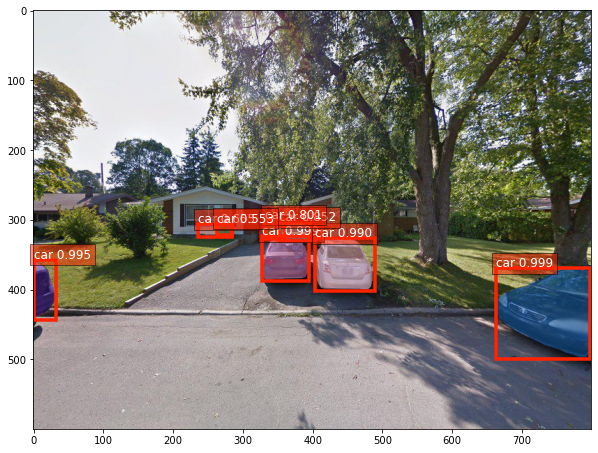

In [10]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()